In [36]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [37]:
# 1) Load data
X, y = load_breast_cancer(return_X_y=True)

In [38]:
# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [39]:
# 3) Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# 4) Train model
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [41]:
# 5) Predict + evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.986013986013986
Confusion matrix:
 [[52  1]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [42]:
# 6) Show threshold tradeoff
proba = clf.predict_proba(X_test)[:, 1]
for thr in [0.3, 0.5, 0.7]:
    y_thr = (proba >= thr).astype(int)
    print("\nThreshold:", thr)
    print(confusion_matrix(y_test, y_thr))



Threshold: 0.3
[[50  3]
 [ 0 90]]

Threshold: 0.5
[[52  1]
 [ 1 89]]

Threshold: 0.7
[[52  1]
 [ 6 84]]


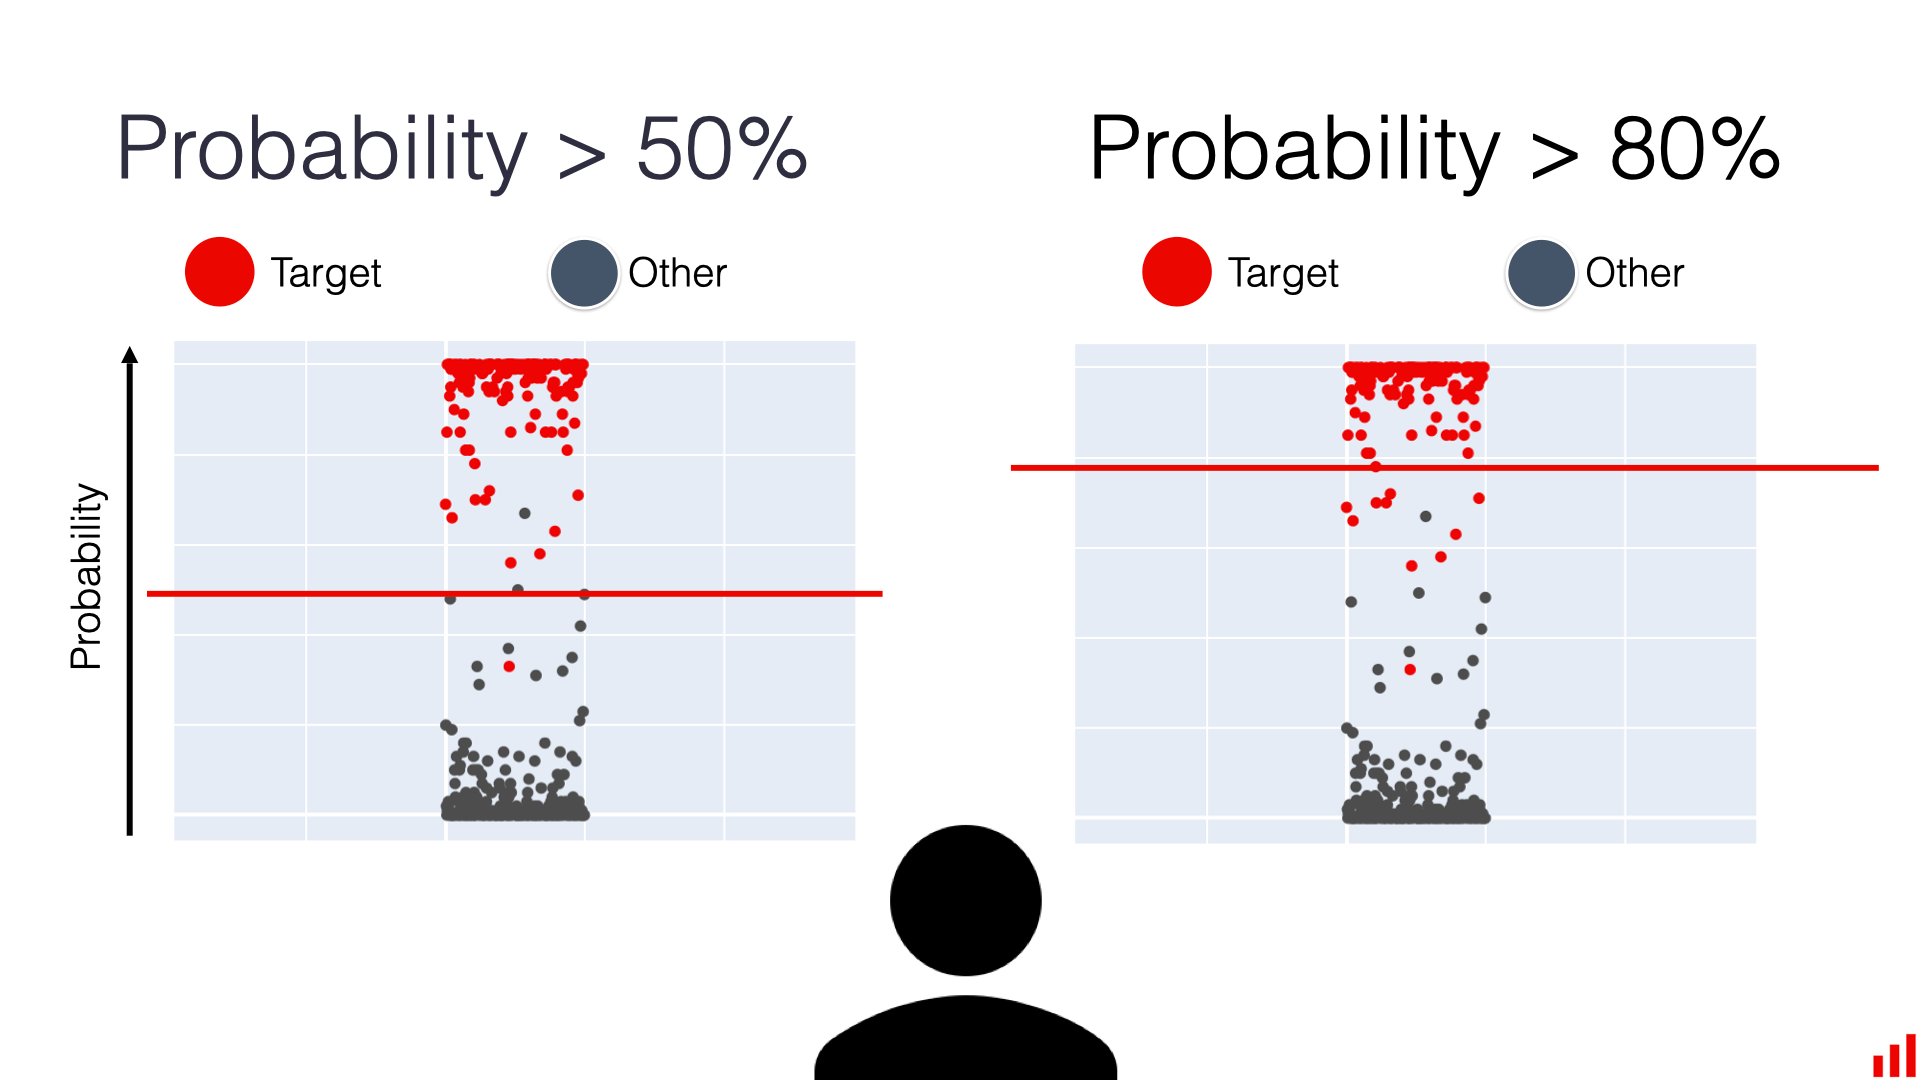